# Colab Introduction

## Benefits of using Colab

### 1. Zero configuration & pre-installed environment

Include some commonly used packages in Python:

In [ ]:
import numpy
import pandas
import sklearn
import matplotlib.pyplot as plt

Also, the common deep learning framework:

In [ ]:
import keras
import torch

### 2. Free access to GPU

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
print(gpu_info)

Thu Sep  9 00:40:28 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
print(torch.cuda.is_available())

True


The "cuda" stands for the **[Compute Unified Device](https://blogs.nvidia.com/blog/2012/09/10/what-is-cuda-2/) Architecture**, which is a parallel computing platform and programming model developed by Nvidia that makes using a GPU for general purpose computing. 

In Pytorch, if the 

```
torch.cuda.is_available()
```

is **True**, then the Pytorch successfully connected to GPU, and we can use GPU to compute and train our models.


### 3. Easy sharing

## Colab Tips:

### 1. Install packages or run commands

Easy to use NLP transformers models:
Transformers: https://huggingface.co/transformers/

In [ ]:
! pip install transformers

     |████████████████████████████████| 2.8 MB 4.3 MB/s 
     |████████████████████████████████| 895 kB 71.4 MB/s 
     |████████████████████████████████| 636 kB 81.4 MB/s 
     |████████████████████████████████| 3.3 MB 78.1 MB/s 
     |████████████████████████████████| 50 kB 8.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Run commands:

Create a test folder

In [ ]:
! mkdir test_folder

### 2. Load drive

Show alll files in your colab:

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive') # mount the drive
cwd = os.path.join('drive', 'MyDrive')
print(os.listdir(cwd))

Mounted at /content/drive
['Summer Research', 'Colab_Notebooks', 'Untitled0.ipynb', 'ProtoNet (1)', 'ProtoNet', 'Prototype', 'm4_PrototypicalNetwork', 'resultProtoNet_raw_pred.xlsx', 'resultProtoNet_top_5.xlsx', 'MAML (2)', 'rootkey.csv', 'test', 'Prototypical_Network (1)', 'Prototypical_Network', 'MAML (1)', 'MAML', 'MatchingNet', 'Colab Notebooks', 'multiLabel-fewShot', 'train_bert', 'BIA 667 TA']


List all files in this folder:

In [ ]:
cwd = os.path.join('drive', 'MyDrive', 'BIA 667 TA')
print(os.listdir(cwd))

['BTC-USD.csv', 'Quiz solution', 'Lecture Recording', 'Untitled0.ipynb', 'ColabIntroduction.ipynb']


An example to load data in folder:

In [ ]:
import os
import pandas as pd

example_data = pd.read_csv(os.path.join(cwd, 'BTC-USD.csv'))

print(example_data.head())

         date        open        high  ...       close      volume    adjClose
0  2014-09-17  465.864014  468.174011  ...  457.334015  21056800.0  457.334015
1  2014-09-18  456.859985  456.859985  ...  424.440002  34483200.0  424.440002
2  2014-09-19  424.102997  427.834991  ...  394.795990  37919700.0  394.795990
3  2014-09-20  394.673004  423.295990  ...  408.903992  36863600.0  408.903992
4  2014-09-21  408.084991  412.425995  ...  398.821014  26580100.0  398.821014

[5 rows x 7 columns]


## Pytorch Introduction

A linear regression example

$$y = ax + b$$

### 1. Import

> Import the torcch and torch.nn (torch neural networks module)

In [ ]:
# import
import torch
import torch.nn as nn

### 3. Setup device

Set up our training device: 

> If the gpu is available, we will use gpu. Otherwise, use cpu instead.



In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')
print(device)

cuda


### 2. Generate fake regression data

$$y = 2x + 1$$

In [ ]:
# fake data
x = torch.randn(size=(1000, 1)) * 20 + 30
y = 2 * x + 1

### 3. Check data

In [ ]:
print(x[:5])

tensor([[22.5915],
        [34.1492],
        [54.7251],
        [68.9571],
        [59.2344]])


In [ ]:
print(y[:5])

tensor([[ 46.1830],
        [ 69.2985],
        [110.4502],
        [138.9142],
        [119.4688]])


In [ ]:
type(x)

torch.Tensor

In [ ]:
import numpy as np
a = np.array([1, 2, 3])
print(a.shape)

(3,)


In [ ]:
# varify data
print(f'x shape: {x.size()}')
print(f'y shape: {y.size()}')

x shape: torch.Size([1000, 1])
y shape: torch.Size([1000, 1])




```
torch.Tensor.size()
```
will return the size(shape) of the Tensor.  



In our case, the shape is (1000, 1) for x, which means we have 1000 data points and 1 feature.



### 4. Pytorch linear regression model

In [ ]:
# pytorch simple linear regression model
class SimpleLinearRegression(nn.Module):
    # initilize and set up the layers
    def __init__(self):
        # initialize parent class
        super(SimpleLinearRegression, self).__init__()
        # define linear layer
        self.linear = nn.Linear(in_features=1, out_features=1, bias=True)
    
    # how to pass your data through NN
    def forward(self, x):
        output = self.linear(x)
        return output

# model object
model = SimpleLinearRegression()

Pytorch Linear layers:
[Linear Layers](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)  

$$y = ax + b$$

Take a look at the initialized parameters

In [ ]:
print([i for i in model.parameters()])

[Parameter containing:
tensor([[-0.4829]], requires_grad=True), Parameter containing:
tensor([0.4355], requires_grad=True)]


Use the randomly initialized parameters to predict:

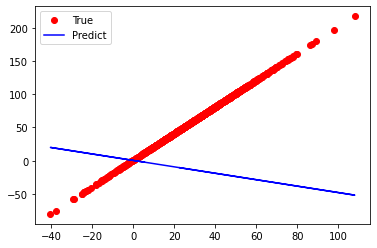

In [ ]:
import matplotlib.pyplot as plt

predicted = model(x).detach().numpy()

plt.plot(x.detach().numpy(), y.detach().numpy(), 'ro', label='True')
plt.plot(x.detach().numpy(), predicted, 'b', label='Predict')
plt.legend()
plt.show()

### 5. Define a loss function and optimizer

In [ ]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### 6. Training

In [ ]:
# move data & model to (device: GPU)
x = x.to(device)
y = y.to(device)
model = model.to(device)

In [ ]:
print(x[:5])

tensor([[22.5915],
        [34.1492],
        [54.7251],
        [68.9571],
        [59.2344]], device='cuda:0')


In [ ]:
# training loop
loss_history = []
for epoch in range(10000):
    # forward
    y_hat = model(x)
    # calculate loss
    loss = loss_func(y_hat, y)
    loss_history.append(loss.detach().item())
    # backward: calculate the gradients
    loss.backward()
    # update weight based on gradients
    optimizer.step()
    optimizer.zero_grad()
    # print
    if (epoch + 1) % 400 == 0:
        print(f"epoch:{epoch + 1}, loss:{loss.item():.5f}")

epoch:400, loss:0.21843
epoch:800, loss:0.15564
epoch:1200, loss:0.10374
epoch:1600, loss:0.06379
epoch:2000, loss:0.03557
epoch:2400, loss:0.01758
epoch:2800, loss:0.00749
epoch:3200, loss:0.00265
epoch:3600, loss:0.00075
epoch:4000, loss:0.00016
epoch:4400, loss:0.00002
epoch:4800, loss:0.00000
epoch:5200, loss:0.00000
epoch:5600, loss:0.00000
epoch:6000, loss:0.00000
epoch:6400, loss:0.00000
epoch:6800, loss:0.00000
epoch:7200, loss:0.00000
epoch:7600, loss:0.00000
epoch:8000, loss:0.00000
epoch:8400, loss:0.00000
epoch:8800, loss:0.00000
epoch:9200, loss:0.00000
epoch:9600, loss:0.00000
epoch:10000, loss:0.00000


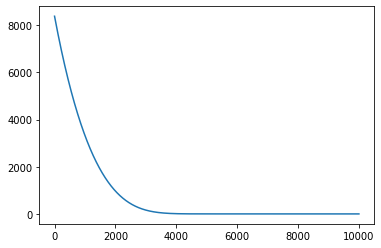

In [ ]:
plt.plot(loss_history)

In [ ]:
print([i for i in model.parameters()])

[Parameter containing:
tensor([[2.]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([1.0000], device='cuda:0', requires_grad=True)]


### 6. Varify training result

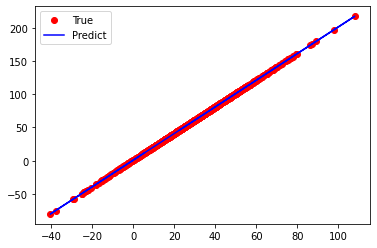

In [ ]:
predicted = model(x).cpu().detach().numpy()

plt.plot(x.cpu().detach().numpy(), y.cpu().detach().numpy(), 'ro', label='True')
plt.plot(x.cpu().detach().numpy(), predicted, 'b', label='Predict')
plt.legend()
plt.show()